# Metric Convergence - TODO

MAE, MSE, and RMSE are the consistent counterpart of the L1, squared L2, and L2
**functional** norm respectively. So they must converge against their integral
if the resolution is refined.

In [1]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

In [26]:
import exponax as ex

In [28]:
def get_difference(
    num_points, domain_extent, metric_fn, true_value, pred_fn, ref_fn=None
):
    grid_1d = ex.make_grid(1, domain_extent, num_points)
    u = pred_fn(grid_1d)
    if ref_fn is not None:
        u_ref = ref_fn(grid_1d)
        metric_result = metric_fn(u, u_ref)
    else:
        metric_result = metric_fn(u, true_value)
    return abs(metric_result - true_value)

In [ ]:
num_points_range = 2 ** jnp.arange(4, 10)

## Smooth Functions

### MSE

In [33]:
true_value_smooth_mse = (
    0.0886137772936767597782376343064707483999019551036447917203998375
)
domain_extent_smooth_mse = 2 * jnp.pi
fn_smooth_mse = lambda x: jnp.exp(-100 * (x - 1) ** 2) * jnp.sin(x)

In [36]:
error_range_smooth_mse = [
    get_difference(
        num_points,
        domain_extent_smooth_mse,
        ex.metrics.MSE,
        true_value_smooth_mse,
        fn_smooth_mse,
    )
    for num_points in num_points_range
]

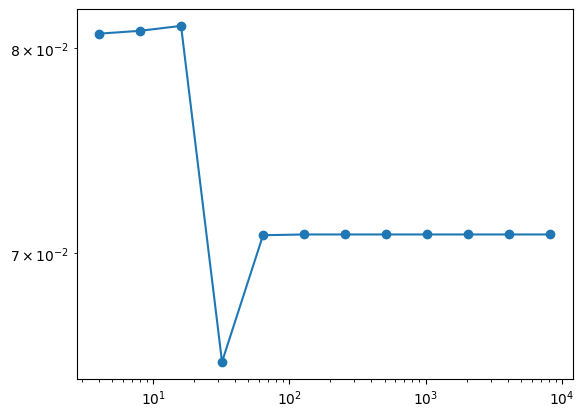

In [37]:
plt.loglog(num_points_range, error_range_smooth_mse, "-o")

In [3]:
domain_extent_smooth_mse = 2.0
grid_1d = ex.make_grid(1, domain_extent_smooth_mse, 1000)

In [4]:
u_0 = jnp.sin(grid_1d)
u_1 = jnp.cos(3 * grid_1d)

In [5]:
ex.metrics.MSE(u_0, u_1, domain_extent=1 / domain_extent_smooth_mse)

Array(0.6714828, dtype=float32)

In [6]:
def get_difference(num_points):
    grid_1d = ex.make_grid(1, domain_extent_smooth_mse, num_points)
    u_0 = jnp.sin(grid_1d)
    u_1 = jnp.cos(3 * grid_1d)

    produced_error = ex.metrics.MSE(
        u_0, u_1, domain_extent=1 / domain_extent_smooth_mse
    )
    correct_value = 2.68493

    diff = abs(produced_error - correct_value)

    return diff

In [30]:
num_points_range = 2 ** jnp.arange(2, 14)

In [31]:
error_range = [get_difference(num_points) for num_points in num_points_range]

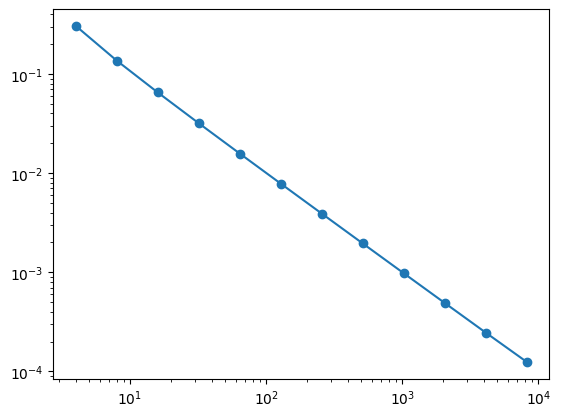

In [32]:
plt.loglog(num_points_range, error_range, "o-")

In [33]:
def get_difference(num_points):
    grid_1d = ex.make_grid(1, 1.0, num_points)
    u = jnp.exp(-100 * (grid_1d - 0.5) ** 2)
    norm = ex.metrics.MSE(u)
    correct_value = 0.125331

    diff = abs(norm - correct_value)

    return diff

In [34]:
error_range = [get_difference(num_points) for num_points in num_points_range]

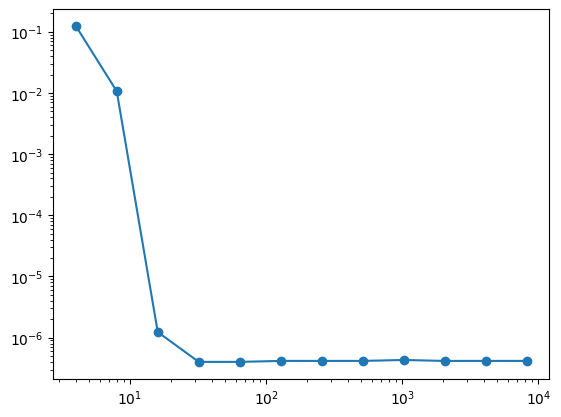

In [37]:
plt.loglog(num_points_range, error_range, "o-")

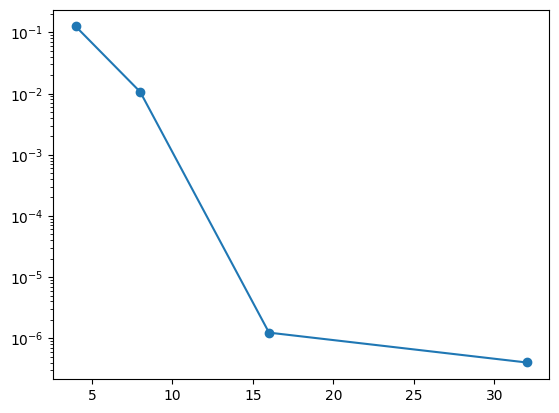

In [39]:
plt.semilogy(num_points_range[:4], error_range[:4], "o-")

# MSE error

https://www.wolframalpha.com/input?i=int_0%5E%282*pi%29+f%5E2+dx++with+f%28x%29+%3D+e%5E%28-100+*+%28x-1%29%5E2%29+*+sin%28x%29

In [7]:
true_value_smooth_mse = (
    0.0886137772936767597782376343064707483999019551036447917203998375
)
domain_extent_smooth_mse = 2 * jnp.pi
fn_smooth_mse = lambda x: jnp.exp(-100 * (x - 1) ** 2) * jnp.sin(x)

In [8]:
def get_difference(num_points):
    grid_1d = ex.make_grid(1, domain_extent_smooth_mse, num_points)
    u = fn_smooth_mse(grid_1d)
    approximation = ex.metrics.MSE(u, domain_extent=domain_extent_smooth_mse)

    diff = abs(approximation - true_value_smooth_mse)

    return diff

In [9]:
num_points_range = 2 ** jnp.arange(2, 14)

In [10]:
error_range = [get_difference(num_points) for num_points in num_points_range]

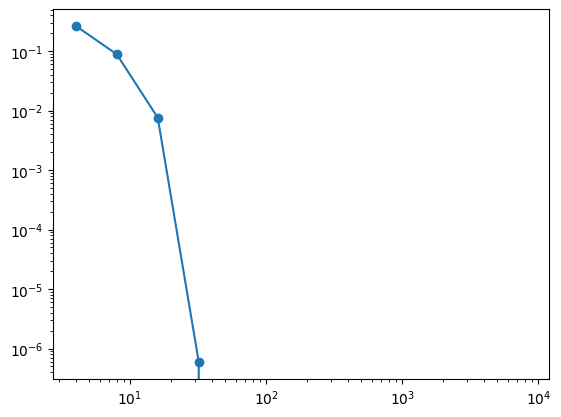

In [11]:
plt.loglog(num_points_range, error_range, "o-")

# MAE Error

In [22]:
true_value_smooth_mse = (
    0.1487744473186810166740730299247331106126900314034849949126656085
)

In [23]:
def get_difference(num_points):
    grid_1d = ex.make_grid(1, domain_extent_smooth_mse, num_points)
    u = fn_smooth_mse(grid_1d)
    approximation = ex.metrics.MAE(u, domain_extent=domain_extent_smooth_mse)

    diff = abs(approximation - true_value_smooth_mse)

    return diff

In [24]:
error_range = [get_difference(num_points) for num_points in num_points_range]

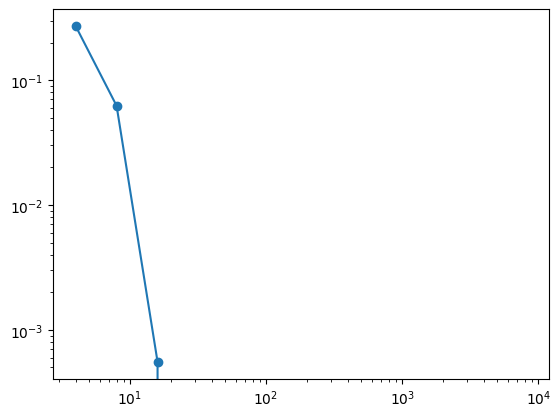

In [25]:
plt.loglog(num_points_range, error_range, "o-")

# Sobolev H1 error

In [12]:
true_value_smooth_mse = (
    9.0126572135271277501623951970738217197152721339833724216761316788
)

In [13]:
def get_difference(num_points):
    grid_1d = ex.make_grid(1, domain_extent_smooth_mse, num_points)
    u = fn_smooth_mse(grid_1d)
    approximation = ex.metrics.H1_MSE(u, domain_extent=domain_extent_smooth_mse)

    diff = abs(approximation - true_value_smooth_mse)

    return diff

In [14]:
error_range = [get_difference(num_points) for num_points in num_points_range]

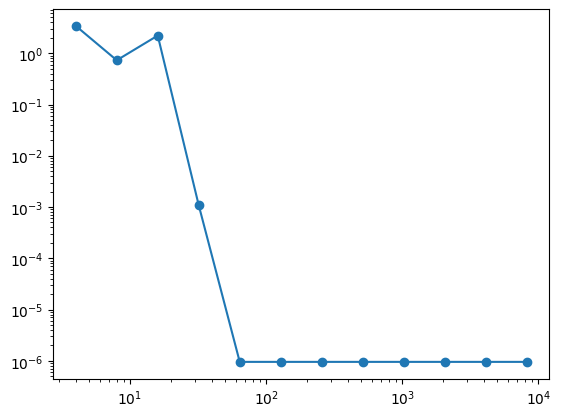

In [15]:
plt.loglog(num_points_range, error_range, "o-")

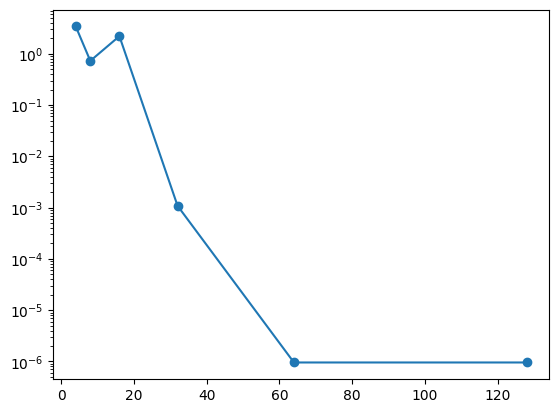

In [21]:
plt.semilogy(num_points_range[:6], error_range[:6], "o-")